#Classification of Water Consumption Types

[Assignment SI - Infos](https://drive.google.com/file/d/1lh5a0YxVsC-NXtsIpucTVCrfJR_8KZB4/view?usp=sharing)

[Dataset Train](https://virtual.ipb.pt/access/content/group/5b961040-5442-11ee-bfc7-421e367e2b5a/Assignment/train.csv)

[Dataset Competition](https://virtual.ipb.pt/access/content/group/5b961040-5442-11ee-bfc7-421e367e2b5a/Assignment/competition.csv)

### 1) **IMPORT** and **UTILITY**

Import all usefull libraries and define some usefull functions

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

import torch
import torch.nn as nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler

### 2) **READ DATA FILES**

Read data file uploaded to this google colab

In [ ]:
train = pd.read_csv("train.csv")

In [ ]:
train.shape

(329975, 6)

In [ ]:
train.head()

,Year,Month,Consumer_type,Consumption,Consumer_number,Installation_zone
0,2013,1,domestic,0,MOGV36480546611521,Installation_zone 1
1,2013,1,industrial,5,BECS02817768252637,Installation_zone 2
2,2013,1,domestic,6,VRFW65577141436242,Installation_zone 2
3,2013,1,domestic,1,QLLI18662653137621,Installation_zone 2
4,2013,1,domestic,13,HYUO61823402850645,Installation_zone 2


In [ ]:
train.info

<bound method DataFrame.info of         Year  Month   Consumer_type  Consumption     Consumer_number  \
0       2013      1        domestic            0  MOGV36480546611521   
1       2013      1      industrial            5  BECS02817768252637   
2       2013      1        domestic            6  VRFW65577141436242   
3       2013      1        domestic            1  QLLI18662653137621   
4       2013      1        domestic           13  HYUO61823402850645   
...      ...    ...             ...          ...                 ...   
329970  2020     12        domestic            0  ZSOE03393580274296   
329971  2020     12  rural domestic            0  RVZG94535208799772   
329972  2020     12  rural domestic            0  DWGA69725679861554   
329973  2020     12  rural domestic            0  VJDC45865594518045   
329974  2020     12        domestic           14  MJUV42827152944728   

           Installation_zone  
0        Installation_zone 1  
1        Installation_zone 2  
2        I

In [ ]:
print(train['Consumer_type'].unique())

['domestic' 'industrial' 'rural commercial' 'construction'
 'low income families' 'rural domestic' 'rural expansion']


In [ ]:
domestic_qtd = train['Consumer_type'].value_counts()['domestic']
print(domestic_qtd)

236167


 ### 3) **Pre Processing**

   

In [ ]:
le_ct = LabelEncoder()
le_ct.fit(train['Consumer_type'].unique())

le_iz = LabelEncoder()
le_iz.fit(train['Installation_zone'].unique())

le_cn = LabelEncoder()
le_cn.fit(train['Consumer_number'].unique())

train_le = train

train_le['Consumer_type'] = le_ct.transform(train['Consumer_type'])
train_le['Installation_zone'] = le_iz.transform(train['Installation_zone'])
train_le['Consumer_number'] = le_cn.transform(train['Consumer_number'])

# le_ct.classes_
# print(le_ct.inverse_transform([0, 1, 2, 3, 4, 5, 6]))
# print(le_iz.classes_)
# print(train_le['Installation_zone'].unique())

In [ ]:
train.head()

,Year,Month,Consumer_type,Consumption,Consumer_number,Installation_zone
0,2013,1,1,0,13456,0
1,2013,1,2,5,1273,11
2,2013,1,1,6,23079,11
3,2013,1,1,1,17600,11
4,2013,1,1,13,8598,11


In [ ]:
train_le.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329975 entries, 0 to 329974
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   Year               329975 non-null  int64
 1   Month              329975 non-null  int64
 2   Consumer_type      329975 non-null  int64
 3   Consumption        329975 non-null  int64
 4   Consumer_number    329975 non-null  int64
 5   Installation_zone  329975 non-null  int64
dtypes: int64(6)
memory usage: 15.1 MB


In [ ]:
scaler = MinMaxScaler()

industrial_df = train_le[train_le['Consumer_type'] == 2]
industrial_df = industrial_df.drop('Consumer_type', axis=1)
industrial_train_mms = pd.DataFrame(scaler.fit_transform(industrial_df.values), index=industrial_df.index, columns=industrial_df.columns)

rural_commercial_df = train_le[train_le['Consumer_type'] == 4]
rural_commercial_df = rural_commercial_df.drop('Consumer_type', axis=1)
rural_commercial_train_mms = pd.DataFrame(scaler.fit_transform(rural_commercial_df.values), index=rural_commercial_df.index, columns=rural_commercial_df.columns)

construction_df = train_le[train_le['Consumer_type'] == 0]
construction_df = construction_df.drop('Consumer_type', axis=1)
construction_train_mms = pd.DataFrame(scaler.fit_transform(construction_df.values), index=construction_df.index, columns=construction_df.columns)

low_income_families_df = train_le[train_le['Consumer_type'] == 3]
low_income_families_df = low_income_families_df.drop('Consumer_type', axis=1)
low_income_families_train_mms = pd.DataFrame(scaler.fit_transform(low_income_families_df.values), index=low_income_families_df.index, columns=low_income_families_df.columns)

rural_domestic_df = train_le[train_le['Consumer_type'] == 5]
rural_domestic_df = rural_domestic_df.drop('Consumer_type', axis=1)
rural_domestic_train_mms = pd.DataFrame(scaler.fit_transform(rural_domestic_df.values), index=rural_domestic_df.index, columns=rural_domestic_df.columns)

rural_expansion_df = train_le[train_le['Consumer_type'] == 6]
rural_expansion_df = rural_expansion_df.drop('Consumer_type', axis=1)
rural_expansion_train_mms = pd.DataFrame(scaler.fit_transform(rural_expansion_df.values), index=rural_expansion_df.index, columns=rural_expansion_df.columns)

In [ ]:
import os
import logging
import numpy as np
import pandas as pd
import tensorflow as tf

In [ ]:
# physical_devices = tf.config.list_physical_devices('GPU')

# print("GPU:", tf.config.list_physical_devices('GPU'))
# print("Num GPUs:", len(physical_devices))

# device_name = tf.test.gpu_device_name()
# if device_name != '/device:GPU:0':
#   raise SystemError('GPU device not found')
# print('Found GPU at: {}'.format(device_name))

GPU: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Num GPUs: 1
Found GPU at: /device:GPU:0


In [ ]:
tf.get_logger().setLevel(logging.ERROR)


class Gan():

    def __init__(self, data):

        self.data = data
        self.n_epochs = 1000

    # Genereta random noise in a latent space
    def _noise(self):
        noise = np.random.rand(self.data.shape[0], self.data.shape[1])
        return noise

    def _generator(self):
        model = tf.keras.Sequential(name="Generator_model")
        model.add(tf.keras.layers.Dense(15, activation='relu',
                                        kernel_initializer='he_uniform',
                                        input_dim=self.data.shape[1]))
        model.add(tf.keras.layers.Dense(30, activation='relu'))
        model.add(tf.keras.layers.Dense(
            self.data.shape[1], activation='linear'))
        return model

    def _discriminator(self):
        model = tf.keras.Sequential(name="Discriminator_model")
        model.add(tf.keras.layers.Dense(25, activation='relu',
                                        kernel_initializer='he_uniform',
                                        input_dim=self.data.shape[1]))
        model.add(tf.keras.layers.Dense(50, activation='relu'))
        # sigmoid => real or fake
        model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
        model.compile(loss='binary_crossentropy',
                      optimizer='adam',
                      metrics=['accuracy'])

        return model

    # define the combined generator and discriminator model,
    # for updating the generator
    def _GAN(self, generator, discriminator):
        discriminator.trainable = False
        generator.trainable = True
        model = tf.keras.Sequential(name="GAN")
        model.add(generator)
        model.add(discriminator)
        model.compile(loss='binary_crossentropy', optimizer='adam')
        return model

    # train the generator and discriminator
    def train(self, generator, discriminator, gan):

        G_losses = []
        D_losses = []

        # determine half the size of one batch, for updating the  discriminator
        # manually enumerate epochs
        for epoch in range(self.n_epochs):

            # Train the discriminator
            generated_data = generator.predict(self._noise())
            labels = np.concatenate([np.ones(self.data.shape[0]), np.zeros(self.data.shape[0])])
            X = np.concatenate([self.data, generated_data])
            discriminator.trainable = True
            d_loss , _ = discriminator.train_on_batch(X, labels)

            # Train the generator
            noise = self._noise()
            g_loss = gan.train_on_batch(noise, np.ones(self.data.shape[0]))

            G_losses.append(g_loss)
            D_losses.append(d_loss)

            print('>%d, D = %f, G = %f' %(epoch+1, d_loss, g_loss))

        return generator, G_losses, D_losses

659/659 [==============================] - 2s 3ms/step
>1, D = 0.734848, G = 0.690034
659/659 [==============================] - 1s 2ms/step
>2, D = 0.724398, G = 0.687035
659/659 [==============================] - 1s 1ms/step
>3, D = 0.713675, G = 0.683687
659/659 [==============================] - 1s 1ms/step
>4, D = 0.702981, G = 0.680000
659/659 [==============================] - 1s 1ms/step
>5, D = 0.693026, G = 0.676813
659/659 [==============================] - 1s 1ms/step
>6, D = 0.682275, G = 0.673136
659/659 [==============================] - 1s 1ms/step
>7, D = 0.672197, G = 0.669632
659/659 [==============================] - 1s 1ms/step
>8, D = 0.662770, G = 0.666266
659/659 [==============================] - 1s 1ms/step
>9, D = 0.653216, G = 0.663314
659/659 [==============================] - 1s 1ms/step
>10, D = 0.643864, G = 0.660314
659/659 [==============================] - 1s 2ms/step
>11, D = 0.634495, G = 0.657413
659/659 [==============================] - 1s 1ms/st

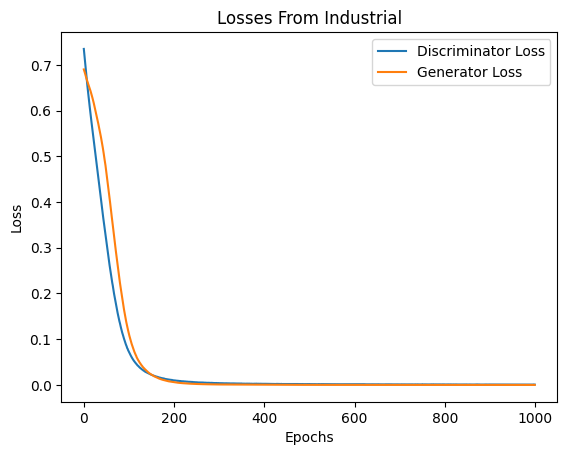

In [ ]:
G = Gan(industrial_train_mms)
gen, G_losses, D_losses = G.train(G._generator(), G._discriminator(), G._GAN(G._generator(), G._discriminator()))

industrial_generated = gen.predict(np.random.rand((domestic_qtd - industrial_train_mms.shape[0]), industrial_train_mms.shape[1]))

plt.title('Losses From Industrial')
plt.plot(range(len(D_losses)), D_losses, label='Discriminator Loss')
plt.plot(range(len(G_losses)), G_losses, label='Generator Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

174/174 [==============================] - 0s 1ms/step
>1, D = 0.707331, G = 0.563657
174/174 [==============================] - 0s 1ms/step
>2, D = 0.689092, G = 0.554144
174/174 [==============================] - 0s 1ms/step
>3, D = 0.670825, G = 0.545443
174/174 [==============================] - 0s 2ms/step
>4, D = 0.654503, G = 0.539506
174/174 [==============================] - 0s 2ms/step
>5, D = 0.637873, G = 0.532910
174/174 [==============================] - 0s 2ms/step
>6, D = 0.622009, G = 0.523503
174/174 [==============================] - 0s 2ms/step
>7, D = 0.607042, G = 0.517894
174/174 [==============================] - 0s 1ms/step
>8, D = 0.592892, G = 0.511597
174/174 [==============================] - 0s 1ms/step
>9, D = 0.578902, G = 0.504109
174/174 [==============================] - 0s 1ms/step
>10, D = 0.565861, G = 0.498677
174/174 [==============================] - 0s 1ms/step
>11, D = 0.552539, G = 0.490333
174/174 [==============================] - 0s 1ms/st

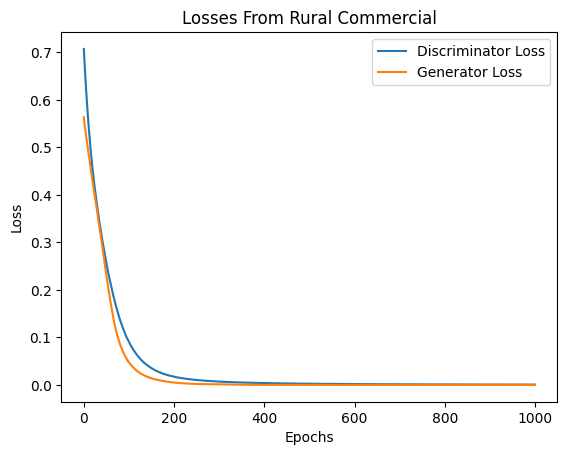

In [ ]:
G = Gan(rural_commercial_train_mms)
gen, G_losses, D_losses = G.train(G._generator(), G._discriminator(), G._GAN(G._generator(), G._discriminator()))

rural_commercial_generated = gen.predict(np.random.rand((domestic_qtd - rural_commercial_train_mms.shape[0]), rural_commercial_train_mms.shape[1]))

plt.title('Losses From Rural Commercial')
plt.plot(range(len(D_losses)), D_losses, label='Discriminator Loss')
plt.plot(range(len(G_losses)), G_losses, label='Generator Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

70/70 [==============================] - 0s 1ms/step
>1, D = 1716.193970, G = 0.738751
70/70 [==============================] - 0s 2ms/step
>2, D = 1464.948608, G = 0.731071
70/70 [==============================] - 0s 2ms/step
>3, D = 1213.009521, G = 0.723509
70/70 [==============================] - 0s 3ms/step
>4, D = 961.328613, G = 0.718341
70/70 [==============================] - 0s 2ms/step
>5, D = 713.952209, G = 0.711944
70/70 [==============================] - 0s 2ms/step
>6, D = 474.118683, G = 0.705745
70/70 [==============================] - 0s 2ms/step
>7, D = 235.915192, G = 0.700593
70/70 [==============================] - 0s 2ms/step
>8, D = 8.663280, G = 0.694242
70/70 [==============================] - 0s 1ms/step
>9, D = 0.310200, G = 0.690080
70/70 [==============================] - 0s 1ms/step
>10, D = 0.314657, G = 0.684849
70/70 [==============================] - 0s 1ms/step
>11, D = 0.317509, G = 0.677777
70/70 [==============================] - 0s 1ms/step
>12,

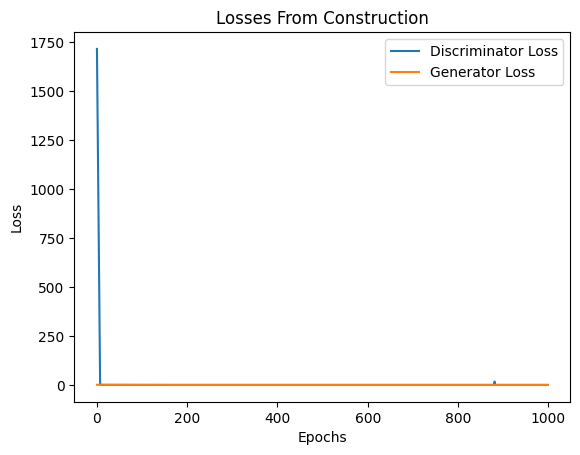

In [ ]:
G = Gan(construction_df)
gen, G_losses, D_losses = G.train(G._generator(), G._discriminator(), G._GAN(G._generator(), G._discriminator()))

construction_generated = gen.predict(np.random.rand((domestic_qtd - construction_df.shape[0]), construction_df.shape[1]))

plt.title('Losses From Construction')
plt.plot(range(len(D_losses)), D_losses, label='Discriminator Loss')
plt.plot(range(len(G_losses)), G_losses, label='Generator Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

32/32 [==============================] - 0s 2ms/step
>1, D = 1594.399048, G = 0.707659
32/32 [==============================] - 0s 1ms/step
>2, D = 1191.157593, G = 0.703765
32/32 [==============================] - 0s 1ms/step
>3, D = 803.228516, G = 0.699289
32/32 [==============================] - 0s 1ms/step
>4, D = 418.276825, G = 0.694975
32/32 [==============================] - 0s 1ms/step
>5, D = 73.926109, G = 0.691924
32/32 [==============================] - 0s 1ms/step
>6, D = 0.282438, G = 0.687454
32/32 [==============================] - 0s 1ms/step
>7, D = 0.283682, G = 0.682789
32/32 [==============================] - 0s 1ms/step
>8, D = 0.282875, G = 0.680502
32/32 [==============================] - 0s 1ms/step
>9, D = 0.281395, G = 0.678074
32/32 [==============================] - 0s 1ms/step
>10, D = 0.279569, G = 0.674112
32/32 [==============================] - 0s 1ms/step
>11, D = 0.277260, G = 0.671878
32/32 [==============================] - 0s 1ms/step
>12, D = 0

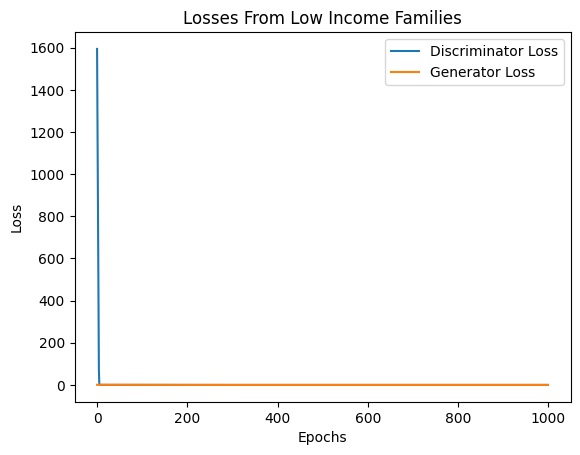

In [ ]:
G = Gan(low_income_families_df)
gen, G_losses, D_losses = G.train(G._generator(), G._discriminator(), G._GAN(G._generator(), G._discriminator()))

low_income_families_generated = gen.predict(np.random.rand((domestic_qtd - low_income_families_df.shape[0]), low_income_families_df.shape[1]))

plt.title('Losses From Low Income Families')
plt.plot(range(len(D_losses)), D_losses, label='Discriminator Loss')
plt.plot(range(len(G_losses)), G_losses, label='Generator Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

1972/1972 [==============================] - 3s 1ms/step
>1, D = 3713.159912, G = 0.686776
1972/1972 [==============================] - 4s 2ms/step
>2, D = 3358.184570, G = 0.679903
1972/1972 [==============================] - 3s 1ms/step
>3, D = 3001.004639, G = 0.672682
1972/1972 [==============================] - 3s 1ms/step
>4, D = 2649.474854, G = 0.665701
1972/1972 [==============================] - 3s 1ms/step
>5, D = 2298.993408, G = 0.658989
1972/1972 [==============================] - 3s 1ms/step
>6, D = 1948.152954, G = 0.652633
1972/1972 [==============================] - 3s 2ms/step
>7, D = 1589.709473, G = 0.646101
1972/1972 [==============================] - 3s 1ms/step
>8, D = 1228.304443, G = 0.640158
1972/1972 [==============================] - 3s 1ms/step
>9, D = 865.577515, G = 0.634254
1972/1972 [==============================] - 3s 1ms/step
>10, D = 502.203217, G = 0.628555
1972/1972 [==============================] - 3s 1ms/step
>11, D = 138.260864, G = 0.622728


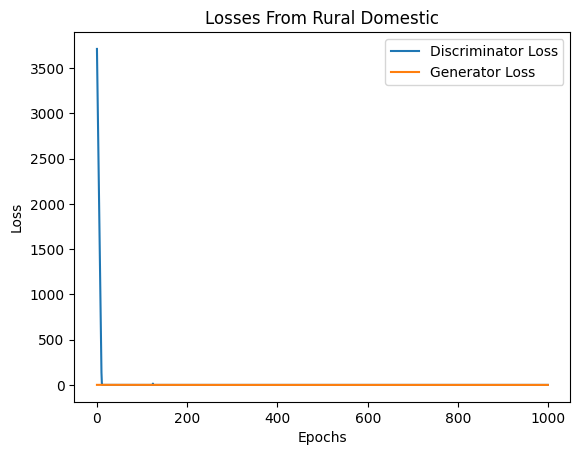

In [ ]:
G = Gan(rural_domestic_df)
gen, G_losses, D_losses = G.train(G._generator(), G._discriminator(), G._GAN(G._generator(), G._discriminator()))

rural_domestic_generated = gen.predict(np.random.rand((domestic_qtd - rural_domestic_df.shape[0]), rural_domestic_df.shape[1]))

plt.title('Losses From Rural Domestic')
plt.plot(range(len(D_losses)), D_losses, label='Discriminator Loss')
plt.plot(range(len(G_losses)), G_losses, label='Generator Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

28/28 [==============================] - 0s 2ms/step
>1, D = 1474.677979, G = 0.788073
28/28 [==============================] - 0s 1ms/step
>2, D = 1216.042236, G = 0.782342
28/28 [==============================] - 0s 1ms/step
>3, D = 959.293396, G = 0.773526
28/28 [==============================] - 0s 1ms/step
>4, D = 707.033264, G = 0.766123
28/28 [==============================] - 0s 2ms/step
>5, D = 466.367096, G = 0.758022
28/28 [==============================] - 0s 1ms/step
>6, D = 227.702332, G = 0.751605
28/28 [==============================] - 0s 1ms/step
>7, D = 21.342127, G = 0.747265
28/28 [==============================] - 0s 1ms/step
>8, D = 5.502457, G = 0.738085
28/28 [==============================] - 0s 1ms/step
>9, D = 3.670450, G = 0.730627
28/28 [==============================] - 0s 1ms/step
>10, D = 2.667925, G = 0.719652
28/28 [==============================] - 0s 1ms/step
>11, D = 1.814130, G = 0.715378
28/28 [==============================] - 0s 1ms/step
>12, D

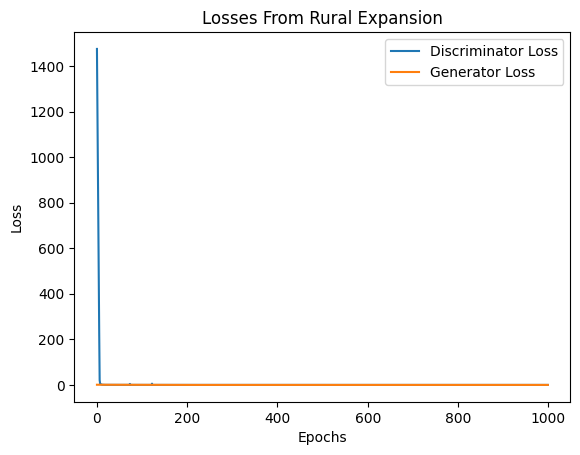

In [ ]:
G = Gan(rural_expansion_df)
gen, G_losses, D_losses = G.train(G._generator(), G._discriminator(), G._GAN(G._generator(), G._discriminator()))

rural_expansion_generated = gen.predict(np.random.rand((domestic_qtd - rural_expansion_df.shape[0]), rural_expansion_df.shape[1]))

plt.title('Losses From Rural Expansion')
plt.plot(range(len(D_losses)), D_losses, label='Discriminator Loss')
plt.plot(range(len(G_losses)), G_losses, label='Generator Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
industrial_generated_df = pd.DataFrame(scaler.inverse_transform(industrial_generated), columns=industrial_train_mms.columns)
industrial_generated_df['Consumer_type'] = 2

rural_commercial_generated_df = pd.DataFrame(scaler.inverse_transform(rural_commercial_generated), columns=rural_commercial_train_mms.columns)
rural_commercial_generated_df['Consumer_type'] = 4

construction_generated_df = pd.DataFrame(scaler.inverse_transform(construction_generated), columns=construction_df.columns)
construction_generated_df['Consumer_type'] = 0

low_income_families_generated_df = pd.DataFrame(scaler.inverse_transform(low_income_families_generated), columns=low_income_families_df.columns)
low_income_families_generated_df['Consumer_type'] = 3

rural_domestic_generated_df = pd.DataFrame(scaler.inverse_transform(rural_domestic_generated), columns=rural_domestic_df.columns)
rural_domestic_generated_df['Consumer_type'] = 5

rural_expansion_generated_df = pd.DataFrame(scaler.inverse_transform(rural_expansion_generated), columns=rural_expansion_df.columns)
rural_expansion_generated_df['Consumer_type'] = 6

generated_df = pd.concat([industrial_generated_df, rural_commercial_generated_df, construction_generated_df, low_income_families_generated_df, rural_domestic_generated_df, rural_expansion_generated_df], axis=0)
generated_df = generated_df.astype('int16').abs()

In [ ]:
generated_df.head()

,Year,Month,Consumption,Consumer_number,Installation_zone,Consumer_type
0,2014,4,67,9881,2,2
1,2020,4,77,3662,0,2
2,2018,5,84,3024,3,2
3,2015,2,39,594,1,2
4,2017,6,95,3494,10,2


In [ ]:
generated_df['Consumer_type'] = le_ct.inverse_transform(generated_df['Consumer_type'])

generated_df = generated_df[generated_df['Installation_zone'].isin(le_iz.transform(le_iz.classes_))]
generated_df['Installation_zone'] = le_iz.inverse_transform(generated_df['Installation_zone'])

generated_df_with_new_consumer_numbers = generated_df[~generated_df['Consumer_number'].isin(le_cn.classes_)]

generated_df = generated_df[generated_df['Consumer_number'].isin(le_cn.classes_)]
generated_df['Consumer_number'] = le_cn.inverse_transform(generated_df['Consumer_number'])

In [ ]:
generated_df.head()

,Year,Month,Consumption,Consumer_number,Installation_zone,Consumer_type


In [ ]:
generated_df_with_new_consumer_numbers.head()

,Year,Month,Consumption,Consumer_number,Installation_zone,Consumer_type
0,2014,4,67,9881,Installation_zone 11,industrial
1,2020,4,77,3662,Installation_zone 1,industrial
2,2018,5,84,3024,Installation_zone 12,industrial
3,2015,2,39,594,Installation_zone 10,industrial
4,2017,6,95,3494,Installation_zone 19,industrial


In [ ]:
generated_df.shape

(0, 6)

In [ ]:
generated_df_with_new_consumer_numbers.shape

(1128167, 6)

In [ ]:
import random
import string

def generate_consumer_number(consumer_number):
    random_part_1 = ''.join(random.choices(string.ascii_uppercase, k=4))
    random_part_2 = ''.join(random.choices(string.digits, k=16))
    consumer_number = random_part_1 + random_part_2
    return consumer_number

In [ ]:
generated_df_with_new_consumer_numbers['Consumer_number'] = generated_df_with_new_consumer_numbers['Consumer_number'].apply(generate_consumer_number)

In [ ]:
generated_df_with_new_consumer_numbers.head()

,Year,Month,Consumption,Consumer_number,Installation_zone,Consumer_type
0,2014,4,67,RKZP4076423758529373,Installation_zone 11,industrial
1,2020,4,77,XNDM8558828266239012,Installation_zone 1,industrial
2,2018,5,84,GBNA8580883519046825,Installation_zone 12,industrial
3,2015,2,39,AXLA0196482792896171,Installation_zone 10,industrial
4,2017,6,95,WCSJ9377382830707313,Installation_zone 19,industrial


In [ ]:
train = pd.read_csv("train.csv")

new_train = pd.concat([train, generated_df_with_new_consumer_numbers, generated_df], axis=0)

In [ ]:
new_train.head()

,Year,Month,Consumer_type,Consumption,Consumer_number,Installation_zone
0,2013,1,domestic,0,MOGV36480546611521,Installation_zone 1
1,2013,1,industrial,5,BECS02817768252637,Installation_zone 2
2,2013,1,domestic,6,VRFW65577141436242,Installation_zone 2
3,2013,1,domestic,1,QLLI18662653137621,Installation_zone 2
4,2013,1,domestic,13,HYUO61823402850645,Installation_zone 2


In [ ]:
new_train.shape

(1458142, 6)

In [ ]:
new_train.to_csv('new_train_v1.csv', sep=',', index=False)